<h1><center>Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, spearmanr, kendalltau
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import chi2_contingency
import statsmodels.api as sm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import des données :
df = pd.read_csv( "/content/drive/MyDrive/AI in Insurance/training.csv", sep=';')
df.head()

,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Value,Adind,SubGroup2,Group2,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
1,200114978,2009,Male,C,Large,Employed,25,18,90,3,15080,0,L46,L,72.012883,365,1,0,0.0,0.0
2,200114994,2009,Male,E,Large,Employed,20,11,30,2,22370,1,O38,O,39.550411,365,1,0,0.0,0.0
3,200115001,2009,Female,E,Large,Unemployed,42,11,150,0,39650,0,Q28,Q,169.529148,365,2,0,0.0,0.0
4,200115011,2009,Female,C,Medium,Housewife,21,5,0,0,12600,1,L6,L,58.894688,365,1,0,0.0,0.0
5,200115015,2009,Female,D,Large,Employed,33,12,30,10,9065,0,N4,N,109.631885,365,2,0,0.0,0.0


**<h1>Goal of the project**

The objective of calculating an annual third-party premium (material + bodily) for the 36,311 contracts in the 2011 pricing dataset : Indeed, we will determine the cost of third-party insurance for each contract on an annual basis. This premium is intended to cover material and bodily damages caused to third parties in the event of an accident where the insured party is at fault.

<h1><center> Analyse préliminaire

In [ ]:
df.shape

(100021, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100021 entries, 1 to 100021
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PolNum      100021 non-null  int64  
 1   CalYear     100021 non-null  int64  
 2   Gender      100021 non-null  object 
 3   Type        100021 non-null  object 
 4   Category    100021 non-null  object 
 5   Occupation  100021 non-null  object 
 6   Age         100021 non-null  int64  
 7   Group1      100021 non-null  int64  
 8   Bonus       100021 non-null  int64  
 9   Poldur      100021 non-null  int64  
 10  Value       100021 non-null  int64  
 11  Adind       100021 non-null  int64  
 12  SubGroup2   100021 non-null  object 
 13  Group2      100021 non-null  object 
 14  Density     100021 non-null  float64
 15  Exppdays    100021 non-null  int64  
 16  Numtppd     100021 non-null  int64  
 17  Numtpbi     100021 non-null  int64  
 18  Indtppd     100021 non-null  float64
 19  In

In [ ]:
df.columns

Index(['PolNum', 'CalYear', 'Gender', 'Type', 'Category', 'Occupation', 'Age',
       'Group1', 'Bonus', 'Poldur', 'Value', 'Adind', 'SubGroup2', 'Group2',
       'Density', 'Exppdays', 'Numtppd', 'Numtpbi', 'Indtppd', 'Indtpbi'],
      dtype='object')

In [ ]:
#Taux de Na pour chaque variable

(df.isna().sum()/len(df))*100

PolNum        0.0
CalYear       0.0
Gender        0.0
Type          0.0
Category      0.0
Occupation    0.0
Age           0.0
Group1        0.0
Bonus         0.0
Poldur        0.0
Value         0.0
Adind         0.0
SubGroup2     0.0
Group2        0.0
Density       0.0
Exppdays      0.0
Numtppd       0.0
Numtpbi       0.0
Indtppd       0.0
Indtpbi       0.0
dtype: float64

In [ ]:
nb_doublons = df.duplicated().sum()
print("Nombre de doublons :", nb_doublons)

Nombre de doublons : 0


Aucune valeur manquante, aucun doublons

##Exploration des variables

#### Pour chaque Variable:
- Info
- Taux de Na
- Valeurs et Nombre de valeurs distinctes
- Étendue des valeurs, Équilibre
- Graphique en barres pour la fréquence de chaque catégorie
- Distribution normale ou non pour les variables quantitatives (test Shapiro)

The training dataset contains:

100,000 unique insurance contracts for the years 2009 and 2010e:
Here is a description of each column in the dataset.

| Column     | Description                                                                  |
|------------|------------------------------------------------------------------------------|
| PolNum     | Contract number                                                              |
| CalYear    | Subscription year                                                            |
| Gender     | Gender of the vehicle driver                                                 |
| Type       | Type of car                                                                  |
| Category   | Car category                                                                 |
| Occupation | Driver's occupation                                                          |
| Age        | Driver's age                                                                 |
| Group1     | Car group                                                                    |
| Bonus      | Bonus-Malus (a discount or surcharge applied based on the claims history)   |
| Poldur     | Age of the insurance contract                                                |
| Value      | Value of the insured vehicle                                                 |
| Adind      | Indicator for material coverage                                              |
| SubGroup2  | Driver's home sub-region                                                     |
| Group2     | Driver's home region                                                         |
| Density    | Population density                                                           |
| Expdays    | Risk Exposure (in days)                                                           |
| Numtppd    | Number of third-party material claims                                        |
| Numtpbi    | Number of third-party bodily injury claims                                   |
| Indtppd    | Total cost of third-party material claims                                    |
| Indtpbi    | Total cost of third-party bodily injury claims                               |


# Variables Cibles

**Indtppd : Coût total des sinistres matériels tiers**

In [ ]:
df['Indtppd'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Indtppd
Non-Null Count   Dtype  
--------------   -----  
100021 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Indtppd"].unique())
df["Indtppd"].nunique()

[   0.          740.30229036  207.32365675 ...  546.40798246  822.92046036
 5800.0189068 ]


12257

In [ ]:
# Étendue des valeurs, Équilibre
print(df["Indtppd"].value_counts())

0.000000       87765
783.291089         1
244.684151         1
4178.451170        1
127.155113         1
               ...  
1079.314685        1
68.457541          1
125.740661         1
630.670303         1
5800.018907        1
Name: Indtppd, Length: 12257, dtype: int64


In [ ]:
# Valeur Minimale
print(df["Indtppd"].min())
# Valeur Maximale
df["Indtppd"].max()

0.0


12878.36991

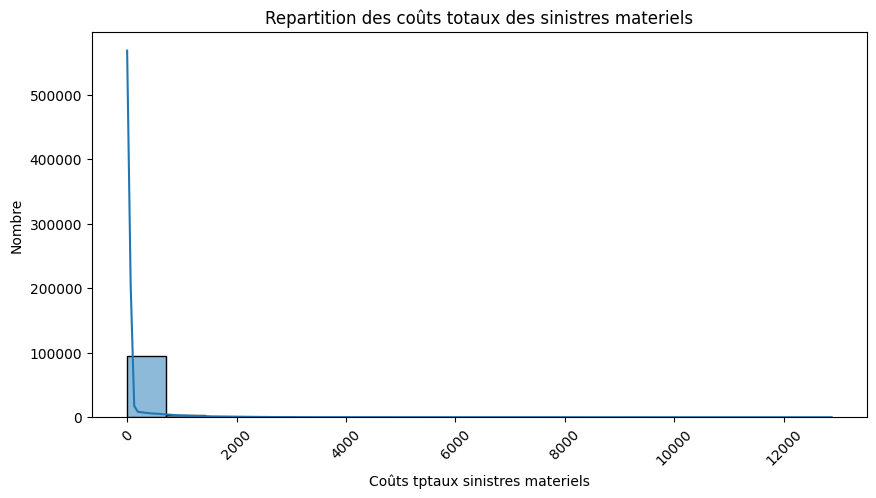

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Indtppd')
sns.histplot(df_sorted['Indtppd'], kde=True)
plt.xlabel('Coûts tptaux sinistres materiels')
plt.ylabel('Nombre')
plt.title('Repartition des coûts totaux des sinistres materiels')
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

In [ ]:
stat, p = shapiro(df['Indtppd'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.25647157430648804
P-value : 0.0
La variable n'est probablement pas normalement distribuée


**Numtppd : Nombre de sinistres matériels tiers**

In [ ]:
df['Numtppd'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Numtppd
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Numtppd"].unique())
df["Numtppd"].nunique()

[1 2 0 3 4 5 6 7]


8

In [ ]:
# Étendue des valeurs, Équilibre
print(df["Numtppd"].value_counts())

0    87744
1    10358
2     1518
3      306
4       62
5       17
6        9
7        7
Name: Numtppd, dtype: int64


In [ ]:
# Valeur Minimale
print(df["Numtppd"].min())
# Valeur Maximale
df["Numtppd"].max()


0


7

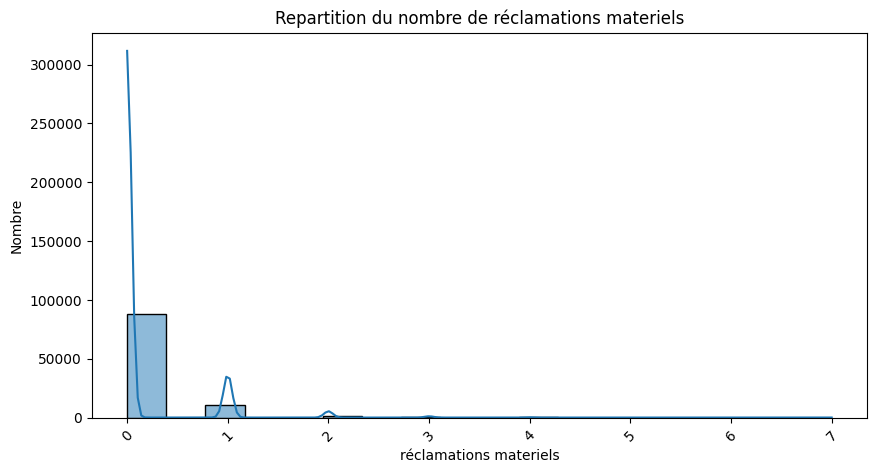

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Numtppd')
sns.histplot(df_sorted['Numtppd'], kde=True)
plt.xlabel('réclamations materiels')
plt.ylabel('Nombre')
plt.title('Repartition du nombre de réclamations materiels')
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

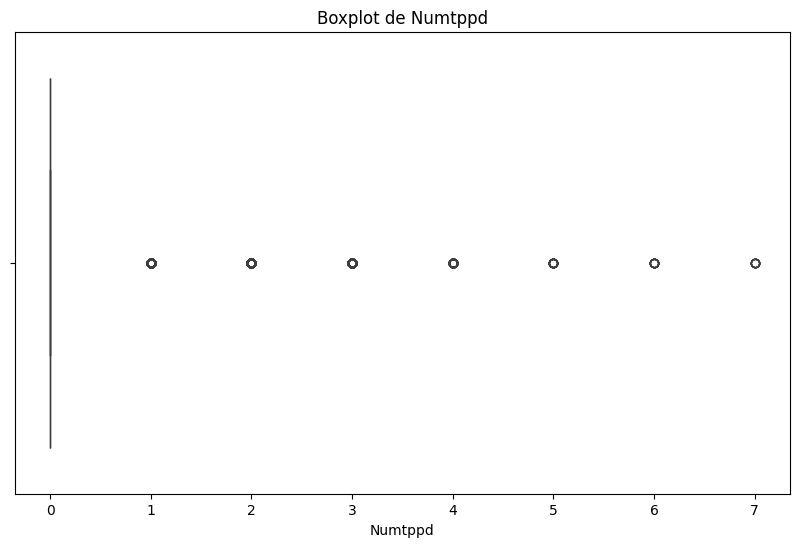

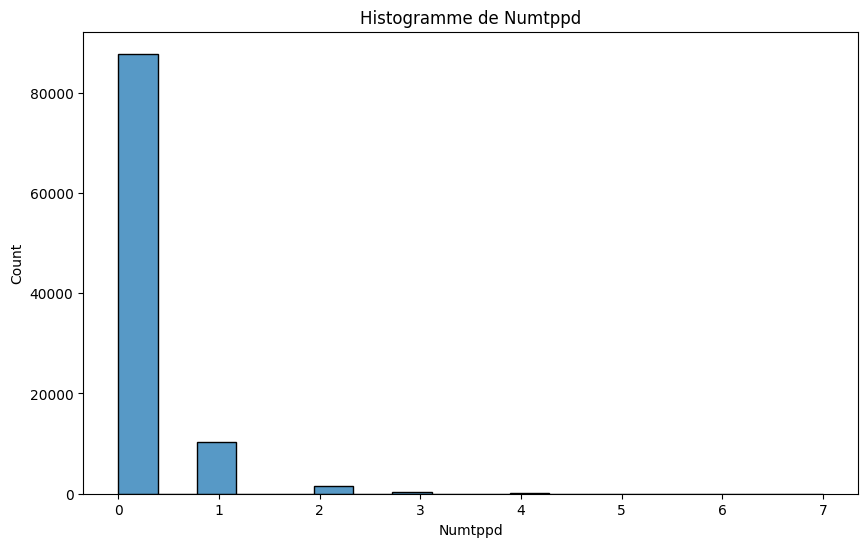

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Numtppd'])
plt.title('Boxplot de Numtppd')
plt.show()

# Création d'un histogramme pour la variable 'Numtppd'
plt.figure(figsize=(10, 6))
sns.histplot(df['Numtppd'], kde=False)
plt.title('Histogramme de Numtppd')
plt.show()

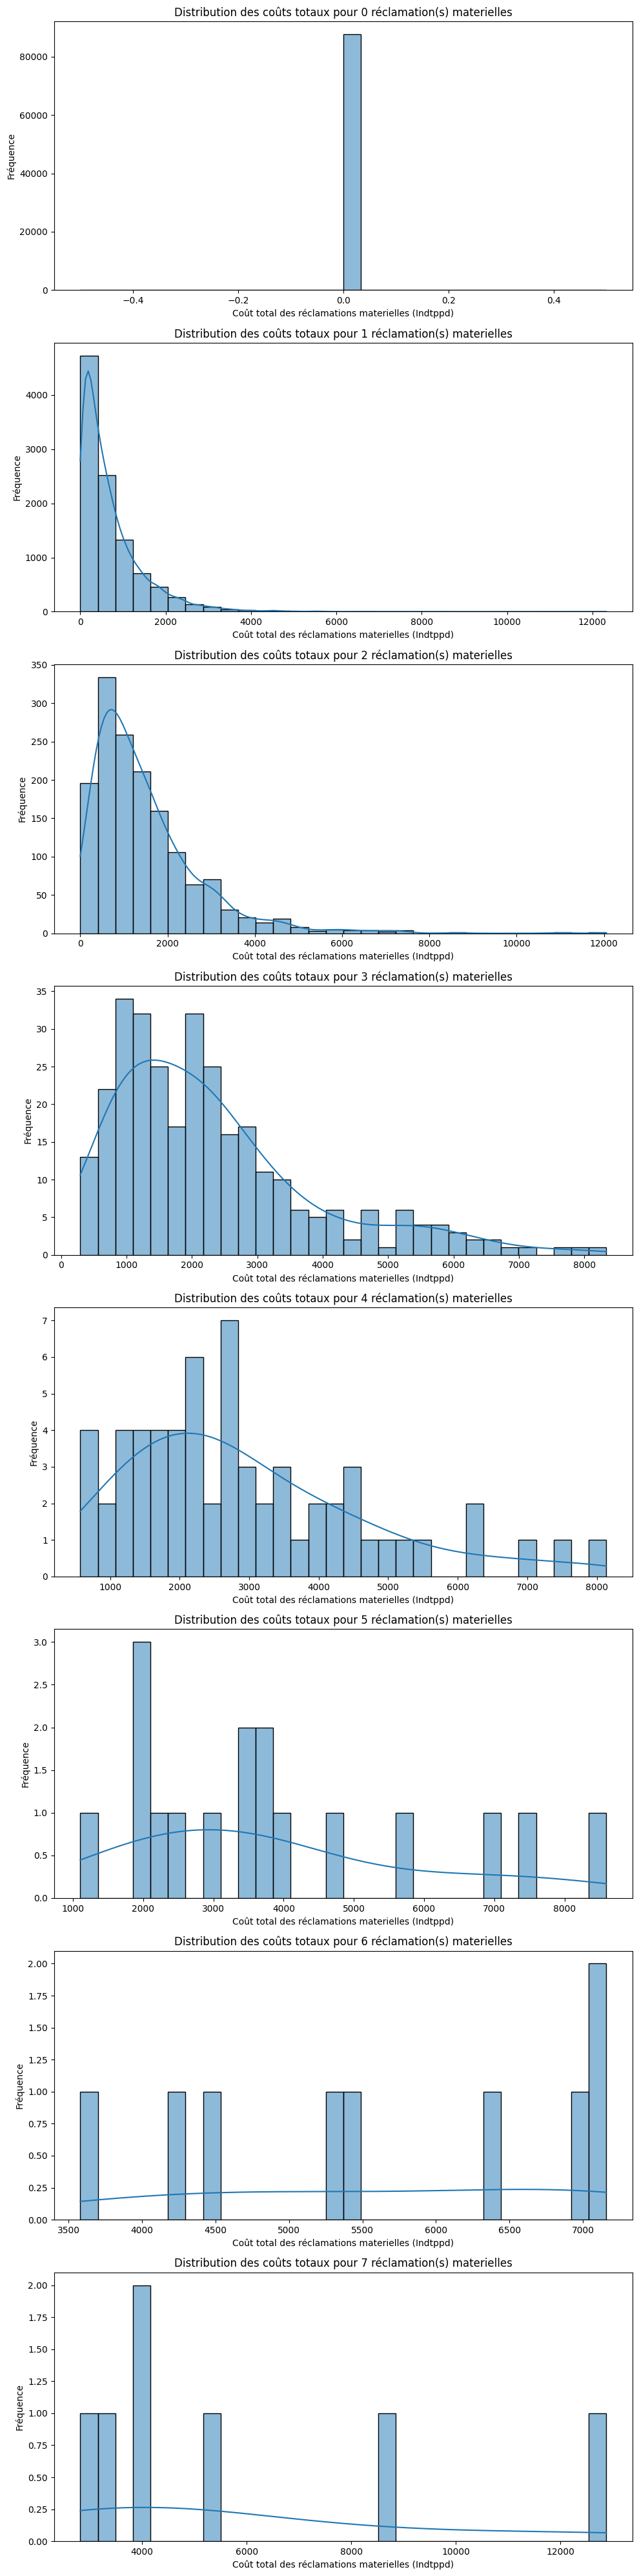

In [ ]:
num_reclamations_range = range(0, 8)

# Créez une figure et un ensemble de subplots
fig, axes = plt.subplots(len(num_reclamations_range), 1, figsize=(10, 5 * len(num_reclamations_range)))

for i, num_reclamations in enumerate(num_reclamations_range):
    # Filtrer le dataset pour les entrées avec un nombre de réclamations spécifique
    data_filtered = df[df['Numtppd'] == num_reclamations]

    # Créer l'histogramme pour le sous-ensemble filtré
    sns.histplot(data_filtered['Indtppd'], kde=True, ax=axes[i], bins=30)  # Ajustez le nombre de bins si nécessaire
    axes[i].set_title(f'Distribution des coûts totaux pour {num_reclamations} réclamation(s) materielles')
    axes[i].set_xlabel('Coût total des réclamations materielles (Indtppd)')
    axes[i].set_ylabel('Fréquence')

# Ajuster les espaces pour éviter le chevauchement
plt.tight_layout()
plt.show()

In [ ]:
stat, p = shapiro(df['Numtppd'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.3739585280418396
P-value : 0.0
La variable n'est probablement pas normalement distribuée


In [ ]:
#Statistiques pour le cout total des reclamations matérielles pour 1 sinistre, puis 2 sinistres, 3 sinistres.... 7 sinistres
stats_by_num_reclamations = {}

for i in range(8):

    filtered_data = df[df['Numtppd'] == i]
    descriptive_stats = filtered_data['Indtppd'].describe()
    stats_by_num_reclamations[i] = descriptive_stats

for num_reclamations, stats in stats_by_num_reclamations.items():
    print(f"Statistiques pour {num_reclamations} réclamations materiels:")
    print(stats, '\n')

Statistiques pour 0 réclamations materiels:
count    87744.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Indtppd, dtype: float64 

Statistiques pour 1 réclamations materiels:
count    10358.000000
mean       707.522071
std        764.733772
min          0.000000
25%        190.422004
50%        472.392778
75%        952.347099
max      12324.736309
Name: Indtppd, dtype: float64 

Statistiques pour 2 réclamations materiels:
count     1518.000000
mean      1475.228957
std       1241.499969
min          0.000000
25%        621.827942
50%       1155.445740
75%       1964.788714
max      12055.247665
Name: Indtppd, dtype: float64 

Statistiques pour 3 réclamations materiels:
count     306.000000
mean     2315.254162
std      1557.730534
min       291.340623
25%      1189.179667
50%      1970.140421
75%      2909.213125
max      8336.177812
Name: Indtppd, dtype: float64 

Statistiques pour 4 réclamations materie

**Indtpbi : Coût total des sinistres corporels tiers**

In [ ]:
df['Indtpbi'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Indtpbi
Non-Null Count   Dtype  
--------------   -----  
100021 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Indtpbi"].unique())
df["Indtpbi"].nunique()

[0.00000000e+00 3.84004453e+03 2.79371442e+03 ... 3.52825919e+00
 1.05603349e+03 1.65076419e+01]


4505

In [ ]:
# Étendue des valeurs, Équilibre
print(df["Indtpbi"].value_counts())

0.000000        95515
2793.714420         2
3840.044532         2
1056.033493         1
13104.914593        1
                ...  
384.224092          1
380.719287          1
879.298513          1
2355.315270         1
16.507642           1
Name: Indtpbi, Length: 4505, dtype: int64


In [ ]:
# Valeur Minimale
print(df["Indtpbi"].min())
# Valeur Maximale
df["Indtpbi"].max()

0.0


69068.026292

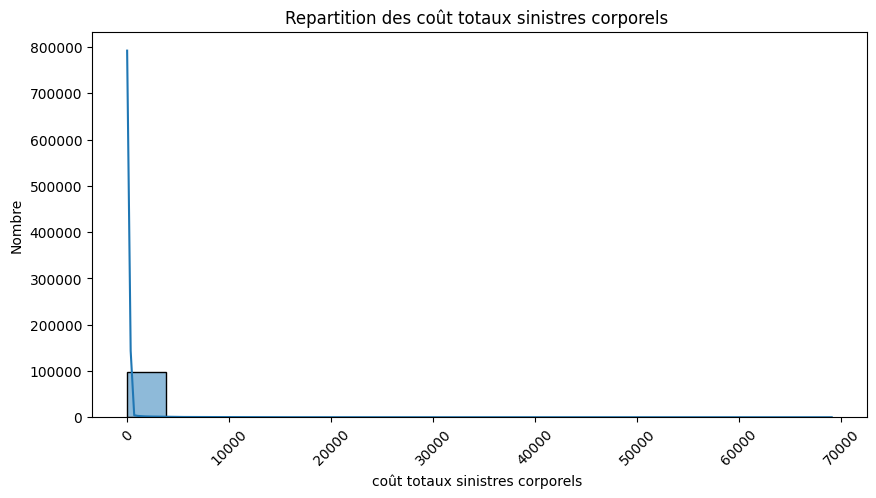

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Indtpbi')
sns.histplot(df_sorted['Indtpbi'], kde=True)
plt.xlabel('coût totaux sinistres corporels ')
plt.ylabel('Nombre')
plt.title('Repartition des coût totaux sinistres corporels ')
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

In [ ]:
stat, p = shapiro(df['Indtpbi'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.0989687442779541
P-value : 0.0
La variable n'est probablement pas normalement distribuée


**Numtpbi : Nombre de sinistres corporels tiers**

In [ ]:
df['Numtpbi'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Numtpbi
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Numtpbi"].unique())
df["Numtpbi"].nunique()

[0 1 2 3]


4

In [ ]:
# Étendue des valeurs, Équilibre
print(df["Numtpbi"].value_counts())

0    95515
1     4338
2      162
3        6
Name: Numtpbi, dtype: int64


In [ ]:
# Valeur Minimale
print(df["Numtpbi"].min())
# Valeur Maximale
df["Numtpbi"].max()


0


3

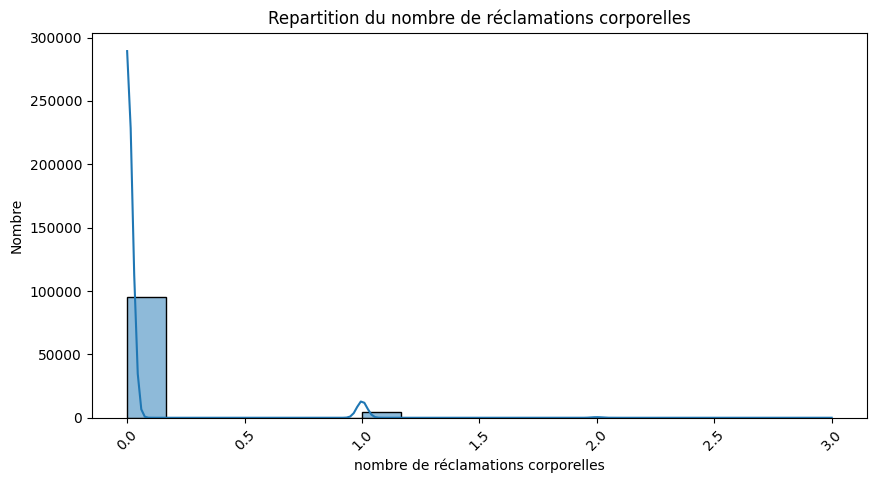

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Numtpbi')
sns.histplot(df_sorted['Numtpbi'], kde=True)
plt.xlabel('nombre de réclamations corporelles')
plt.ylabel('Nombre')
plt.title('Repartition du nombre de réclamations corporelles')
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

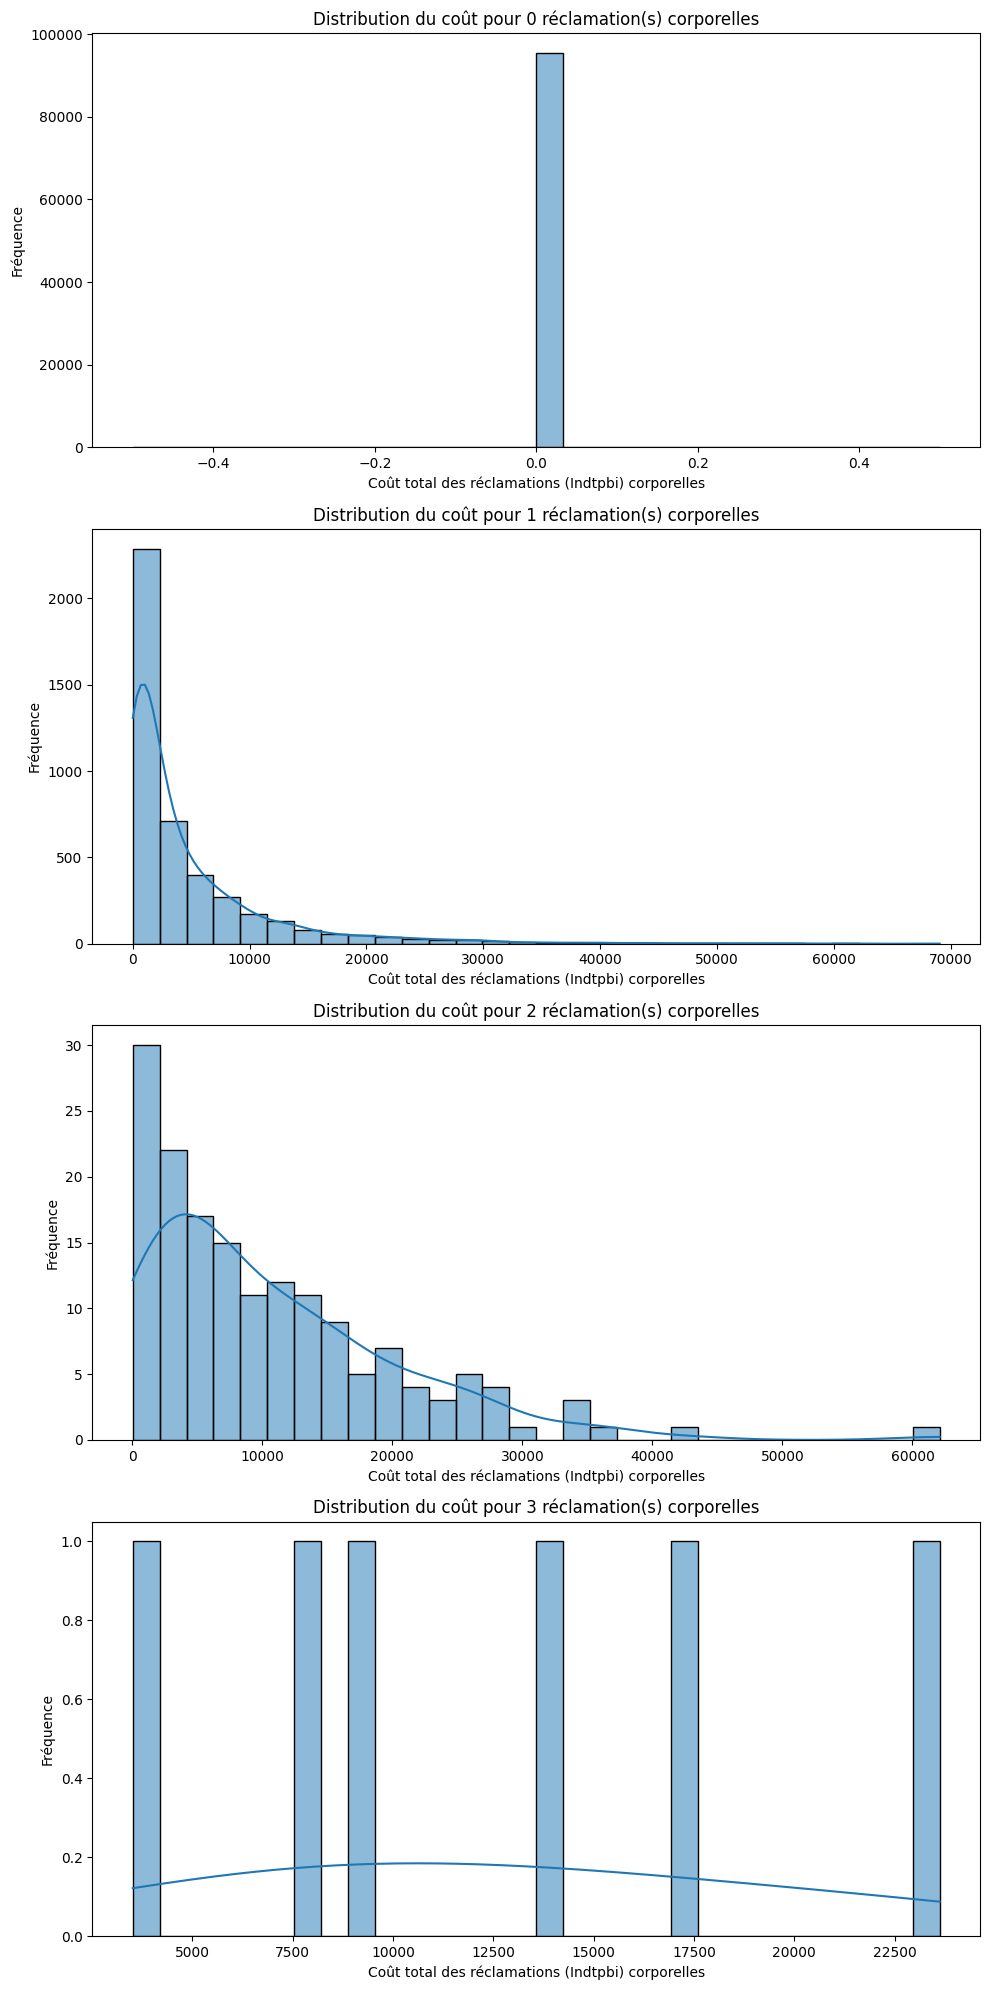

In [ ]:
#coût total des reclamations corporelles quand on a 1 reclamation
num_reclamations_range = range(0, 4)

# Créez une figure et un ensemble de subplots
fig, axes = plt.subplots(len(num_reclamations_range), 1, figsize=(10, 5 * len(num_reclamations_range)))

for i, num_reclamations in enumerate(num_reclamations_range):
    # Filtrer le dataset pour les entrées avec un nombre de réclamations spécifique
    data_filtered = df[df['Numtpbi'] == num_reclamations]

    # Créer l'histogramme pour le sous-ensemble filtré
    sns.histplot(data_filtered['Indtpbi'], kde=True, ax=axes[i], bins=30)  # Ajustez le nombre de bins si nécessaire
    axes[i].set_title(f'Distribution du coût pour {num_reclamations} réclamation(s) corporelles')
    axes[i].set_xlabel('Coût total des réclamations (Indtpbi) corporelles')
    axes[i].set_ylabel('Fréquence')

# Ajuster les espaces pour éviter le chevauchement
plt.tight_layout()
plt.show()

In [ ]:
stat, p = shapiro(df['Numtpbi'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.20966053009033203
P-value : 0.0
La variable n'est probablement pas normalement distribuée


In [ ]:
#Statistiques pour le cout total des reclamations matérielles pour 1 sinistre, puis 2 sinistres, 3 sinistres.... 7 sinistres
stats_by_num_reclamations = {}

for i in range(4):

    filtered_data = df[df['Numtpbi'] == i]

    descriptive_stats = filtered_data['Indtpbi'].describe()
    stats_by_num_reclamations[i] = descriptive_stats


for num_reclamations, stats in stats_by_num_reclamations.items():
    print(f"Statistiques pour {num_reclamations} réclamations corporelles:")
    print(stats, '\n')

Statistiques pour 0 réclamations corporelles:
count    95515.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Indtpbi, dtype: float64 

Statistiques pour 1 réclamations corporelles:
count     4338.000000
mean      4722.353350
std       7103.729694
min          0.001302
25%        470.174977
50%       2039.139466
75%       5990.217728
max      69068.026292
Name: Indtpbi, dtype: float64 

Statistiques pour 2 réclamations corporelles:
count      162.000000
mean     10613.006697
std       9878.120630
min         38.526906
25%       3349.635516
50%       7286.131155
75%      15190.152360
max      62092.741637
Name: Indtpbi, dtype: float64 

Statistiques pour 3 réclamations corporelles:
count        6.000000
mean     12680.839701
std       7183.981095
min       3511.388036
25%       8473.527204
50%      11746.244366
75%      16493.156757
max      23623.079069
Name: Indtpbi, dtype: float64 



# Varibales categorielles






In [ ]:
# Vue d'ensemble
cat_data = df.select_dtypes(include=['object'])
cat_data_mod = []

for var in cat_data.columns:
    modalities = cat_data[var].astype(str).unique()
    count = len(modalities)
    cat_data_mod.append([var, count, np.sort(modalities)])

cat_data_mod = pd.DataFrame(cat_data_mod, columns=['Variable', 'Number of Modalities', 'Modalities'])
display(cat_data_mod)

,Variable,Number of Modalities,Modalities
0,Gender,2,"[Female, Male]"
1,Type,6,"[A, B, C, D, E, F]"
2,Category,3,"[Large, Medium, Small]"
3,Occupation,5,"[Employed, Housewife, Retired, Self-employed, ..."
4,SubGroup2,471,"[L1, L10, L100, L101, L102, L103, L104, L105, ..."
5,Group2,10,"[L, M, N, O, P, Q, R, S, T, U]"


In [ ]:
df.describe(include= ['O'])

,Gender,Type,Category,Occupation,SubGroup2,Group2
count,100021,100021,100021,100021,100021,100021
unique,2,6,3,5,471,10
top,Male,A,Medium,Employed,Q29,L
freq,63443,27760,36644,31150,431,23733


In [ ]:
#Gender : genre du conducteur du véhicule
#Type : type de voiture
#Category : catégorie de la voiture
#Occupation : profession du conducteur
#SubGroup2 : Sous-région du domicile du conducteur
#Group2 : Région du domicile du conducteur

**Gender : genre du conducteur du véhicule**

In [ ]:
df['Gender'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Gender
Non-Null Count   Dtype 
--------------   ----- 
100021 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Gender"].unique())
df["Gender"].nunique()

['Male' 'Female']


2

In [ ]:
# Étendue des valeurs, Équilibre
print(df["Gender"].value_counts())
#Repartition des genres
gender_percentage = df['Gender'].value_counts(normalize=True) * 100
gender_percentage


Male      63443
Female    36578
Name: Gender, dtype: int64


Male      63.42968
Female    36.57032
Name: Gender, dtype: float64

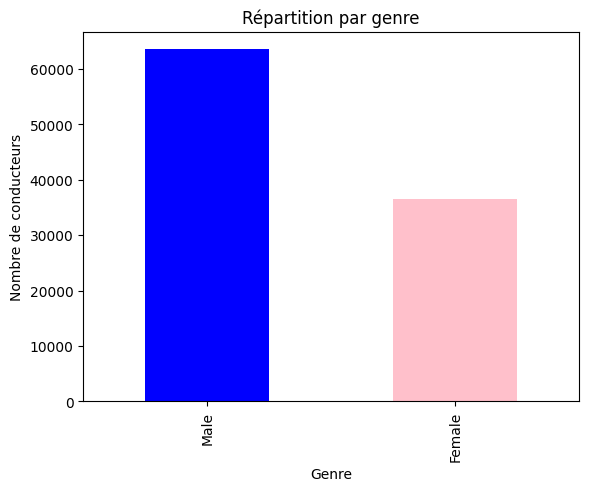

In [ ]:
#Repartition par Genre
colors = ['blue', 'pink']
df['Gender'].value_counts().plot(kind='bar', color=colors)
plt.title('Répartition par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de conducteurs')
plt.show()


In [ ]:
 #Répartition des Types de voiture en fonctiondes Genres
 pd.crosstab(df['Gender'], df['Type'])

Type,A,B,C,D,E,F
Gender,,,,,,
Female,10206,7980,5079,7201,4097,2015
Male,17554,14110,8783,12396,7074,3526


**Type: type de voiture**

In [ ]:
df['Type'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Type
Non-Null Count   Dtype 
--------------   ----- 
100021 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Type"].unique())
df["Type"].nunique()

['C' 'E' 'D' 'B' 'A' 'F']


6

In [ ]:
# Étendue des valeurs, Équilibre
df["Type"].value_counts()

A    27760
B    22090
D    19597
C    13862
E    11171
F     5541
Name: Type, dtype: int64

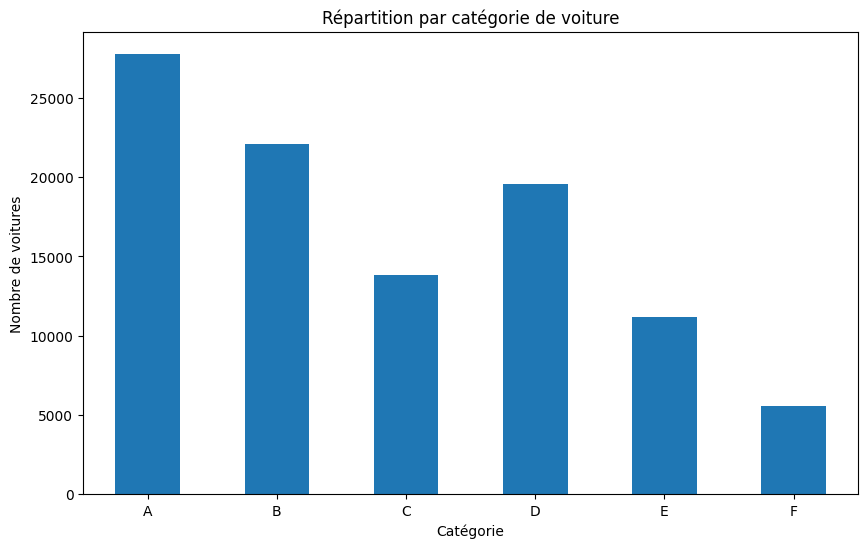

In [ ]:
type_counts = df['Type'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Répartition par catégorie de voiture')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de voitures')
plt.xticks(rotation=0)
plt.show()

**Category: catégorie de la voiture**

In [ ]:
df['Category'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Category
Non-Null Count   Dtype 
--------------   ----- 
100021 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Category"].unique())
df["Category"].nunique()

['Large' 'Medium' 'Small']


3

In [ ]:
# Étendue des valeurs, Équilibre
df["Category"].value_counts()

Medium    36644
Large     35130
Small     28247
Name: Category, dtype: int64

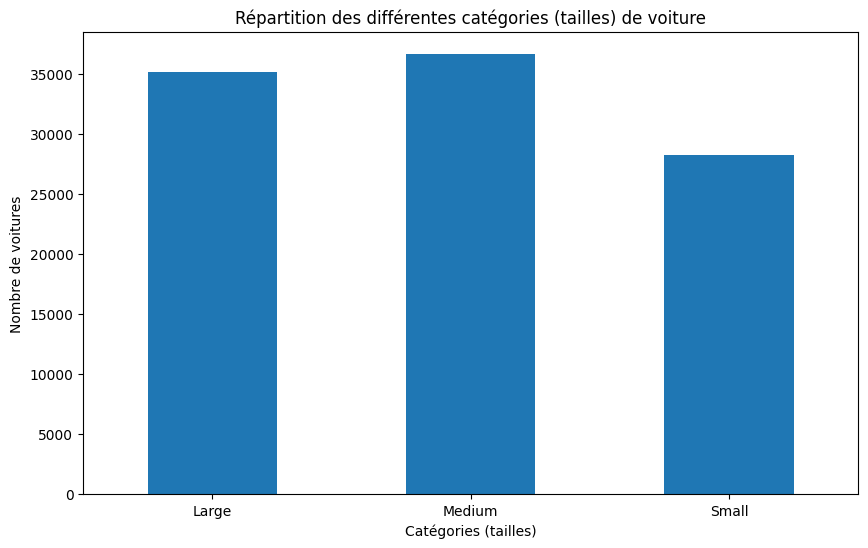

In [ ]:
type_counts = df['Category'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Répartition des différentes catégories (tailles) de voiture')
plt.xlabel('Catégories (tailles)')
plt.ylabel('Nombre de voitures')
plt.xticks(rotation=0)
plt.show()

**Occupation: Profession du conducteur**

In [ ]:
df['Occupation'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Occupation
Non-Null Count   Dtype 
--------------   ----- 
100021 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Occupation"].unique())
df["Occupation"].nunique()


['Employed' 'Unemployed' 'Housewife' 'Self-employed' 'Retired']


5

In [ ]:
# Étendue des valeurs, Équilibre
df["Occupation"].value_counts()

Employed         31150
Self-employed    20372
Housewife        20010
Unemployed       15322
Retired          13167
Name: Occupation, dtype: int64

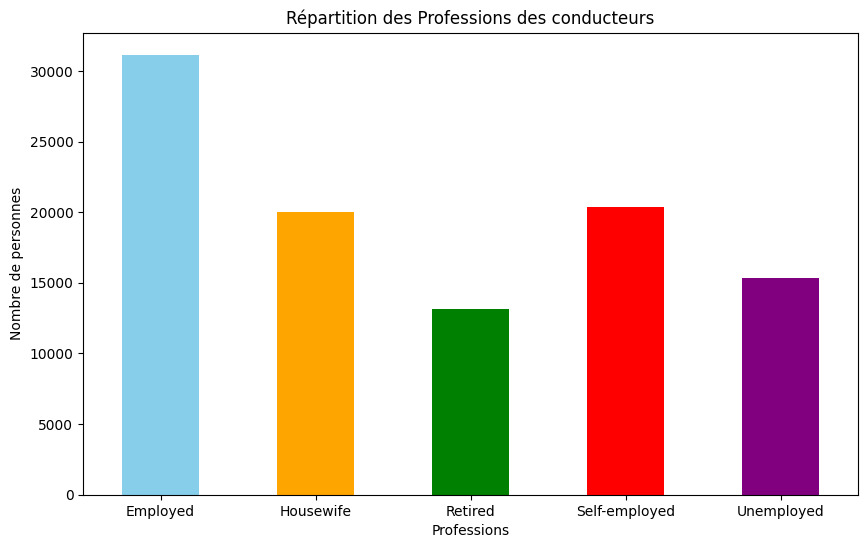

In [ ]:
type_counts = df['Occupation'].value_counts().sort_index()

colors = ['skyblue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=colors)
plt.title('Répartition des Professions des conducteurs')
plt.xlabel('Professions')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Age'>

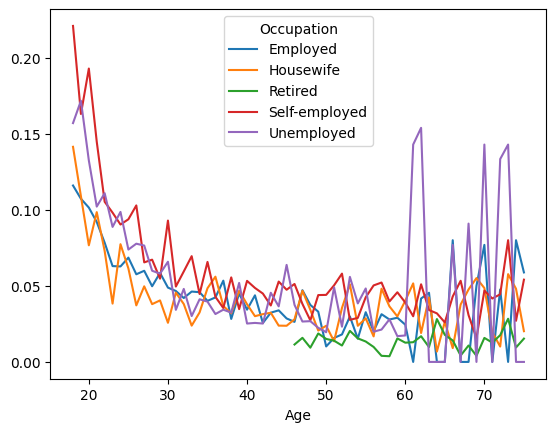

In [ ]:
#Professions en fonction de l'age des conducteurs
var = 'Numtpbi'
df2 = df.groupby(['Age', 'Occupation'], as_index=False)[[var]].mean()
df2.pivot(index='Age', columns='Occupation', values=var).plot()

**Group2: Region du domicile du conducteur**

In [ ]:
df['Group2'].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Group2
Non-Null Count   Dtype 
--------------   ----- 
100021 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Group2"].unique())
df["Group2"].nunique()

['L' 'O' 'Q' 'N' 'R' 'M' 'T' 'P' 'U' 'S']


10

In [ ]:
# Étendue des valeurs, Équilibre
df["Group2"].value_counts()

L    23733
Q    22386
R    15081
M     7597
U     5364
P     5259
O     5216
T     5196
N     5195
S     4994
Name: Group2, dtype: int64

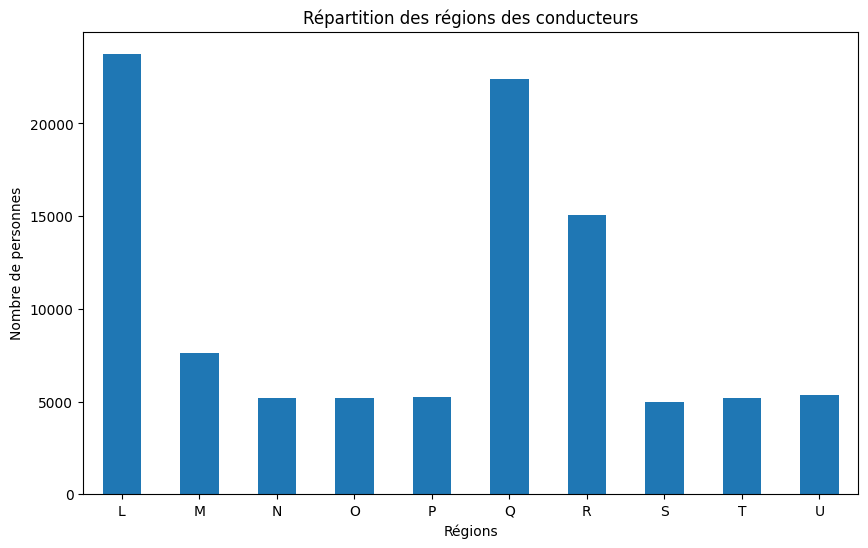

In [ ]:
type_counts = df['Group2'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Répartition des régions des conducteurs')
plt.xlabel('Régions')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=0)
plt.show()

**SubGroup2: Sous-region du domicile du conducteur**

In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["SubGroup2"].unique())
df["SubGroup2"].nunique()

['L46' 'O38' 'Q28' 'L6' 'N4' 'N16' 'Q65' 'R19' 'R9' 'Q22' 'Q13' 'R35' 'M1'
 'O2' 'M21' 'T18' 'R31' 'Q60' 'R33' 'O5' 'L30' 'P20' 'L112' 'R36' 'T29'
 'U17' 'R34' 'M13' 'M4' 'Q41' 'M17' 'Q58' 'R40' 'L105' 'L94' 'L135' 'Q63'
 'R18' 'R45' 'Q9' 'L19' 'Q30' 'M16' 'R20' 'T6' 'Q14' 'T19' 'N13' 'L29'
 'T26' 'L7' 'N11' 'L87' 'R47' 'U12' 'R29' 'T11' 'Q6' 'L130' 'L85' 'P6'
 'Q23' 'R11' 'U7' 'R8' 'N25' 'O11' 'N15' 'L15' 'R32' 'Q49' 'Q15' 'Q34'
 'R17' 'L8' 'N18' 'L84' 'M9' 'M20' 'R28' 'L25' 'R26' 'P12' 'S9' 'Q18'
 'T23' 'M2' 'N17' 'U5' 'L9' 'L83' 'S25' 'R25' 'S10' 'Q51' 'R27' 'O26' 'R1'
 'R44' 'Q47' 'L2' 'R46' 'R38' 'L40' 'Q11' 'N22' 'U20' 'Q26' 'L100' 'L69'
 'Q39' 'L92' 'L44' 'Q45' 'L10' 'O31' 'U8' 'Q1' 'L70' 'S30' 'U6' 'Q12'
 'L98' 'T4' 'Q29' 'R14' 'L47' 'U19' 'O17' 'P19' 'Q7' 'S35' 'L99' 'S14'
 'L113' 'Q43' 'L16' 'M10' 'Q40' 'L116' 'Q16' 'N8' 'Q27' 'N7' 'Q21' 'L117'
 'L55' 'M12' 'R30' 'L18' 'Q59' 'Q64' 'U13' 'P10' 'P34' 'U18' 'M14' 'S39'
 'L102' 'R49' 'L24' 'O21' 'T12' 'Q20' 'L59' 'L88' 'M22' 'S40

471

In [ ]:
# Étendue des valeurs, Équilibre
df["SubGroup2"].value_counts()

Q29    431
Q24    427
Q36    422
Q34    421
Q20    412
      ... 
S39     96
S2      96
S28     95
S12     94
S21     94
Name: SubGroup2, Length: 471, dtype: int64

In [ ]:
pd.crosstab(df['SubGroup2'], df['Occupation']).head()

Occupation,Employed,Housewife,Retired,Self-employed,Unemployed
SubGroup2,,,,,
L1,48,21,21,32,26
L10,58,29,26,37,29
L100,52,43,19,34,37
L101,67,31,25,30,23
L102,62,39,25,35,22


**PolNum: Numéro de contrat**

**CalYear: Année de souscription**

**Adind: Indicateur de couverture matérielle**

# Variables Quantitatives

**Age: age du conducteur**

In [ ]:
# type, nombres valeurs
df["Age"].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Age
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Age"].unique())
df["Age"].nunique()

[25 20 42 21 33 26 29 31 35 27 65 24 22 18 34 41 60 62 37 38 43 36 46 44
 45 47 66 40 48 74 57 68 30 69 61 51 52 71 50 19 73 72 28 53 23 54 63 49
 59 39 56 32 55 58 67 75 70 64]


58

In [ ]:
# Étendue des valeurs, Équilibre
df["Age"].value_counts()

40    2661
35    2655
39    2587
38    2585
41    2569
36    2553
37    2537
33    2483
42    2463
28    2427
43    2420
34    2408
30    2404
29    2397
31    2361
32    2360
44    2314
45    2257
27    2201
46    2199
26    2194
47    2177
25    2171
24    2120
23    1996
48    1990
22    1956
49    1941
21    1915
20    1856
50    1828
51    1769
52    1733
19    1694
18    1684
53    1551
54    1523
55    1451
56    1409
57    1314
58    1237
59    1136
60    1077
61     981
62     944
66     879
63     852
64     835
68     779
65     776
69     721
70     694
67     682
72     680
71     678
73     660
75     655
74     642
Name: Age, dtype: int64

In [ ]:
# Valeur Minimale
print(df["Age"].min())
# Valeur Maximale
df["Age"].max()

18


75

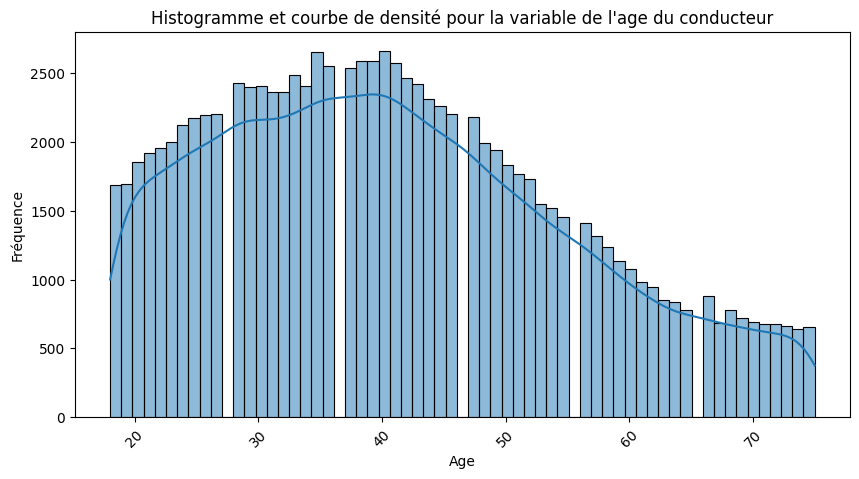

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Age')
sns.histplot(df_sorted['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable de l'age du conducteur")
plt.xticks(rotation=45)
plt.show()

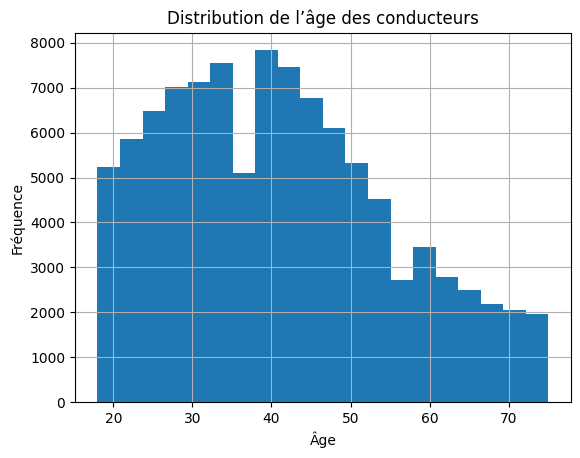

In [5]:
#Distribution de l'âge des conducteurs:

df['Age'].hist(bins=20)
plt.title('Distribution de l’âge des conducteurs')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

<ipython-input-64-9d434d2cbe62>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_age = df.groupby('Age')['Numtppd', 'Numtpbi'].sum().reset_index()


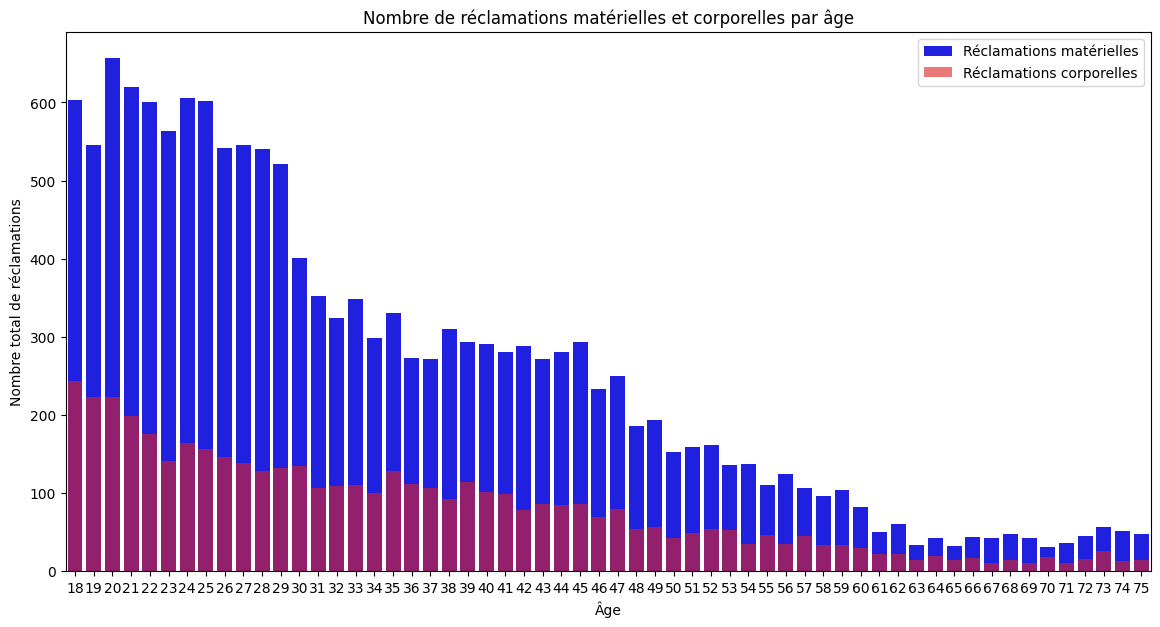

In [ ]:
#Nombre de sinistres (matériels et corporels) en fonction de l'age
groupby_age = df.groupby('Age')['Numtppd', 'Numtpbi'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Age', y='Numtppd', data=groupby_age, color='blue', label='Réclamations matérielles')
sns.barplot(x='Age', y='Numtpbi', data=groupby_age, color='red', label='Réclamations corporelles', alpha=0.6)
plt.xlabel('Âge')
plt.ylabel('Nombre total de réclamations')
plt.title('Nombre de sinistres matériels et corporels par âge')
plt.legend()
plt.show()

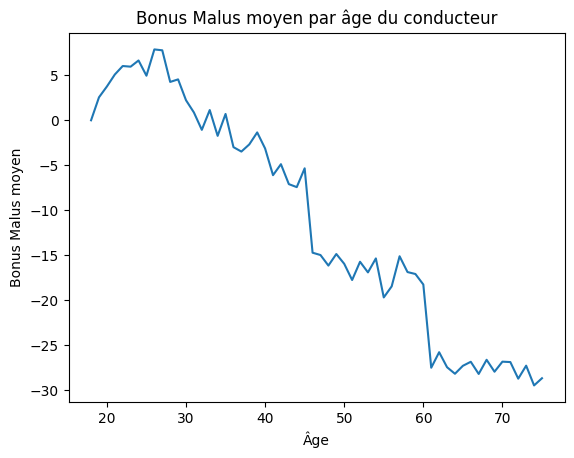

In [6]:
#Moyenne du Bonus Malus par âge du conducteur:
df.groupby('Age')['Bonus'].mean().plot(kind='line')
plt.title('Bonus Malus moyen par âge du conducteur')
plt.xlabel('Âge')
plt.ylabel('Bonus Malus moyen')
plt.show()

Conducteurs plus jeunes : Pour les conducteurs plus jeunes (moins de 30 ans), le Bonus Malus moyen est au-dessus de zéro, ce qui suggère que ces conducteurs ont tendance à avoir moins de réductions sur leurs primes d'assurance, probablement en raison d'un historique de conduite plus court ou d'un risque perçu comme plus élevé.

Déclin avec l'âge : Il y a une tendance générale à la baisse du Bonus Malus moyen avec l'âge, indiquant que les conducteurs plus âgés bénéficient de meilleures réductions sur leurs primes. Cela pourrait refléter une expérience de conduite accrue et une probabilité réduite d'accidents.

Stabilisation après 50 ans : Après 50 ans, le Bonus Malus moyen semble se stabiliser et reste relativement constant jusqu'à 70 ans. Cela pourrait indiquer que les conducteurs dans cette tranche d'âge maintiennent un bon historique de conduite.

Variabilité dans les âges avancés : Il y a une certaine variabilité dans le Bonus Malus moyen pour les conducteurs dans les âges les plus avancés, avec des fluctuations qui pourraient être dues à une plus petite taille de l'échantillon ou à d'autres facteurs tels que des changements dans les habitudes de conduite ou la fréquence d'utilisation du véhicule.

In [ ]:
stat, p = shapiro(df['Age'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.9679588675498962
P-value : 0.0
La variable n'est probablement pas normalement distribuée


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Bonus : Bonus-Malus, une réduction ou un supplément appliqué en fonction de l'historique des sinistres**

In [ ]:
# type, nombres valeurs
df["Bonus"].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Bonus
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Bonus"].unique())
df["Bonus"].nunique()

[ 90  30 150   0  40  80 -20 -40 120 -30  20  50 -50 -10 100  10 110 140
  70  60 130]


21

In [ ]:
# Étendue des valeurs, Équilibre
df["Bonus"].value_counts()

-50     24629
-30     13424
-40     12459
 0       8214
-10      6747
-20      6607
 10      4031
 20      3798
 30      2790
 40      2663
 50      2091
 60      1960
 70      1610
 80      1539
 90      1286
 100     1244
 110     1153
 120     1002
 130      932
 140      930
 150      912
Name: Bonus, dtype: int64

In [ ]:
# Valeur Minimale
print(df["Bonus"].min())
# Valeur Maximale
df["Bonus"].max()

-50


150

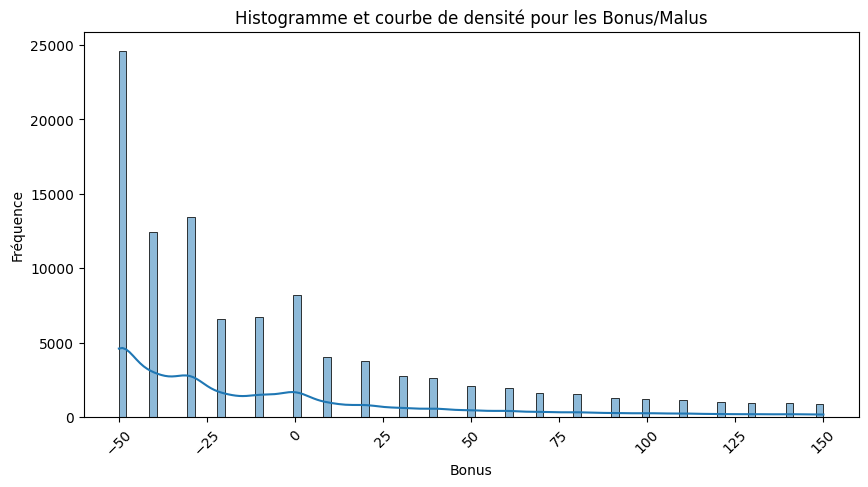

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Bonus')
sns.histplot(df_sorted['Bonus'], kde=True)
plt.xlabel('Bonus')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour les Bonus/Malus")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

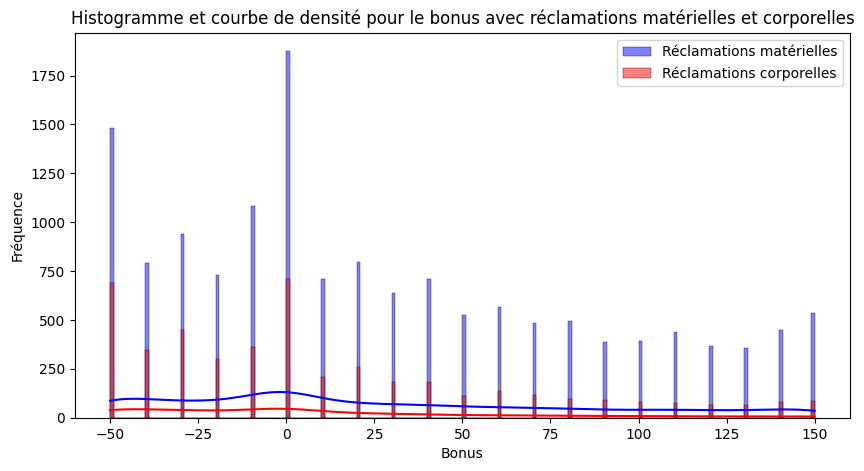

In [ ]:
#Lien entre Bonus et le nombre de réclamations, comment les réclamations antérieures influencent le bonus-malus actuel.
plt.figure(figsize=(10, 5))

# Nous créons d'abord l'histogramme pour les réclamations matérielles
sns.histplot(data=df, x='Bonus', weights='Numtppd', bins=range(df['Bonus'].min(), df['Bonus'].max() + 1), color='blue', label='Réclamations matérielles', kde=True)

# Ensuite, nous superposons l'histogramme pour les réclamations corporelles
sns.histplot(data=df, x='Bonus', weights='Numtpbi', bins=range(df['Bonus'].min(), df['Bonus'].max() + 1), color='red', label='Réclamations corporelles', kde=True)

plt.xlabel('Bonus')
plt.ylabel('Fréquence')
plt.title('Histogramme et courbe de densité pour le bonus avec réclamations matérielles et corporelles')
plt.legend()
plt.show()

<ipython-input-36-de03fdcc8b87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bonus', y='Age', data=df, palette='coolwarm')


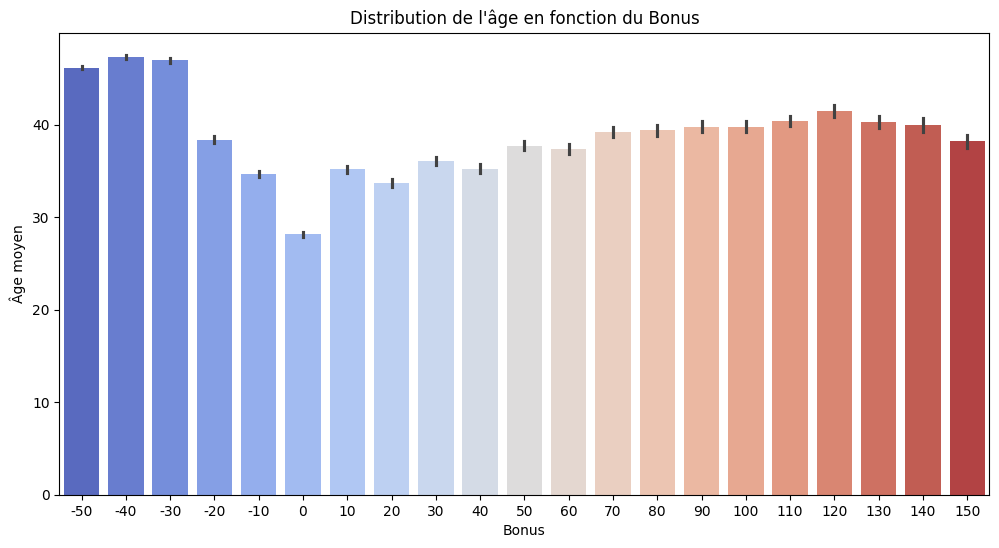

In [ ]:
#Lien entre l'age et le bonus
plt.figure(figsize=(12, 6))
sns.barplot(x='Bonus', y='Age', data=df, palette='coolwarm')

plt.title('Distribution de l\'âge en fonction du Bonus')
plt.xlabel('Bonus')
plt.ylabel('Âge moyen')

# Afficher le barplot
plt.show()

In [ ]:
stat, p = shapiro(df['Bonus'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.8201810121536255
P-value : 0.0
La variable n'est probablement pas normalement distribuée


**Poldur : Age du contrat d'assurance**

In [ ]:
# type, nombres valeurs
df["Poldur"].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Poldur
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Poldur"].unique())
df["Poldur"].nunique()

[ 3  2  0 10  7 13 12  1 15  8  6  5  9 14  4 11]


16

In [ ]:
# Étendue des valeurs, Équilibre
df["Poldur"].value_counts()

0     13739
1     11833
2     10257
3      8385
4      7167
5      6020
6      5358
7      5050
9      4553
8      4502
10     4307
11     4234
12     3927
14     3595
15     3556
13     3538
Name: Poldur, dtype: int64

In [ ]:
# Valeur Minimale
print(df["Poldur"].min())
# Valeur Maximale
df["Poldur"].max()

0


15

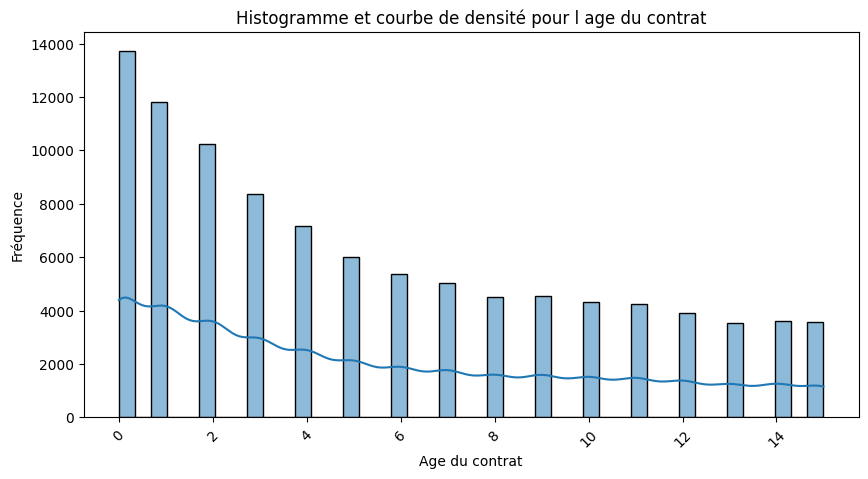

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Poldur')
sns.histplot(df_sorted['Poldur'], kde=True)
plt.xlabel('Age du contrat')
plt.ylabel('Nombre')
plt.title('Histogramme et courbe de densité pour l age du contrat')
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

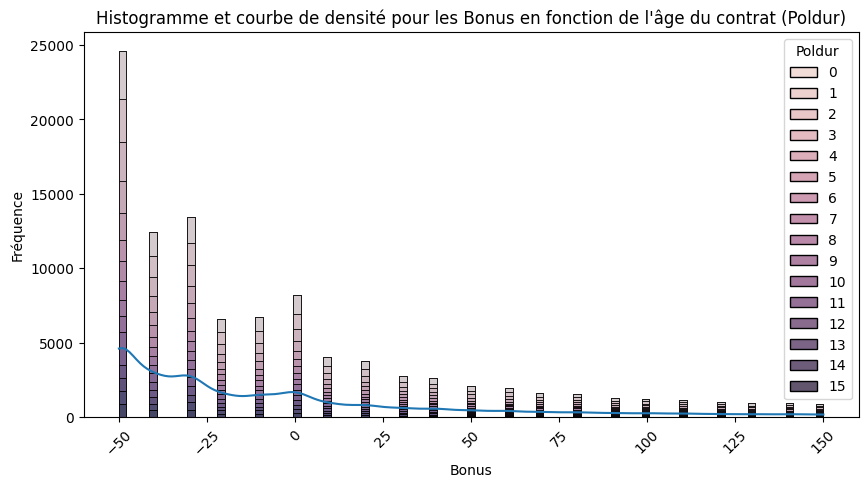

In [ ]:
# Bonus en fonction de l'Age du contrat
plt.figure(figsize=(10, 5))
sns.histplot(df['Bonus'], kde=True)

plt.xlabel('Bonus')

plt.ylabel('Fréquence')


plt.title("Histogramme et courbe de densité pour les Bonus en fonction de l'âge du contrat (Poldur)")

sns.histplot(df, x='Bonus', hue='Poldur', multiple='stack')

plt.xticks(rotation=45)  # Modifier cet angle selon vos préférences
plt.show()

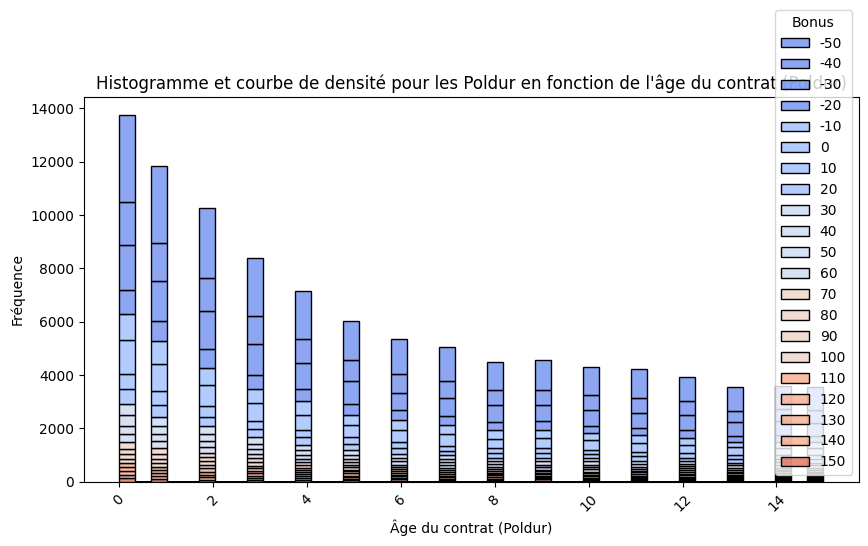

In [ ]:
palette = sns.color_palette("coolwarm", as_cmap=False)
Bonus_min, Bonus_max = df['Bonus'].min(), df['Bonus'].max()
colors = {bonus: palette[int((bonus - Bonus_min) / (Bonus_max - Bonus_min) * (len(palette) - 1))] for bonus in df['Bonus'].unique()}

# Tri des données par 'Poldur'
df_sorted = df.sort_values('Poldur')

plt.figure(figsize=(10, 5))

# Création de l'histogramme empilé avec les couleurs personnalisées
sns.histplot(data=df_sorted, x='Poldur', hue='Bonus', multiple='stack', palette=colors)

plt.xlabel('Âge du contrat (Poldur)')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour les Poldur en fonction de l'âge du contrat (Poldur)")
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='Poldur'>

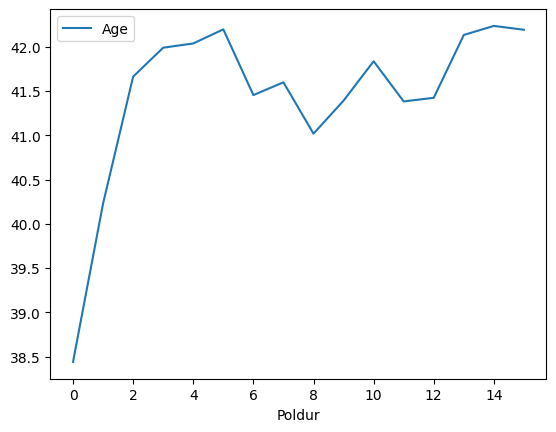

In [ ]:
df.groupby(['Poldur'])[['Age']].mean().plot()
#la relation entre la durée de la police d'assurance et l'âge moyen des assurés

In [ ]:
stat, p = shapiro(df['Poldur'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.908252477645874
P-value : 0.0
La variable n'est probablement pas normalement distribuée


**Value: Valeur de la voiture de l'assuré**

In [7]:
# type, nombres valeurs
df["Value"].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Value
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Value"].unique())
df["Value"].nunique()

[15080 22370 39650 ... 48025 47190 36615]


9395

In [ ]:
# Étendue des valeurs, Équilibre
df["Value"].value_counts()

9385     56
8015     54
8245     52
9665     50
9175     50
         ..
38000     1
31045     1
45440     1
38935     1
36615     1
Name: Value, Length: 9395, dtype: int64

In [ ]:
# Valeur Minimale
print(df["Value"].min())
# Valeur Maximale
df["Value"].max()

1000


49995

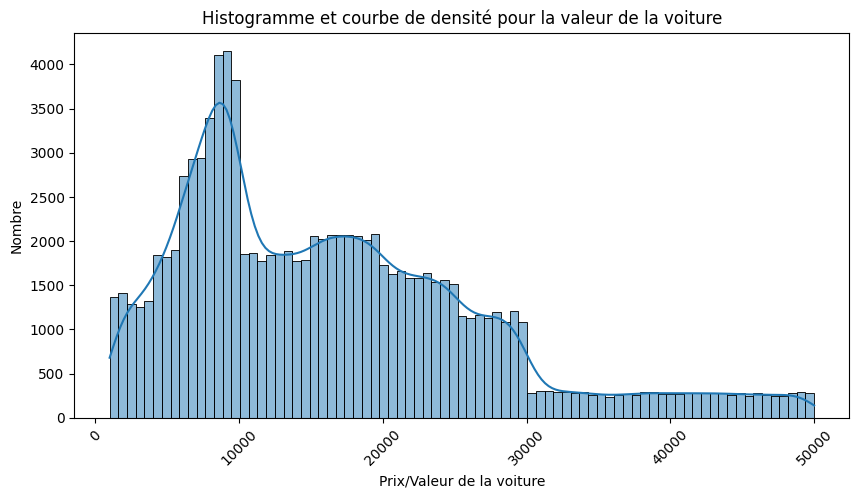

In [ ]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Value')
sns.histplot(df_sorted['Value'], kde=True)
plt.xlabel('Prix/Valeur de la voiture')
plt.ylabel('Nombre')
plt.title('Histogramme et courbe de densité pour la valeur de la voiture')
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

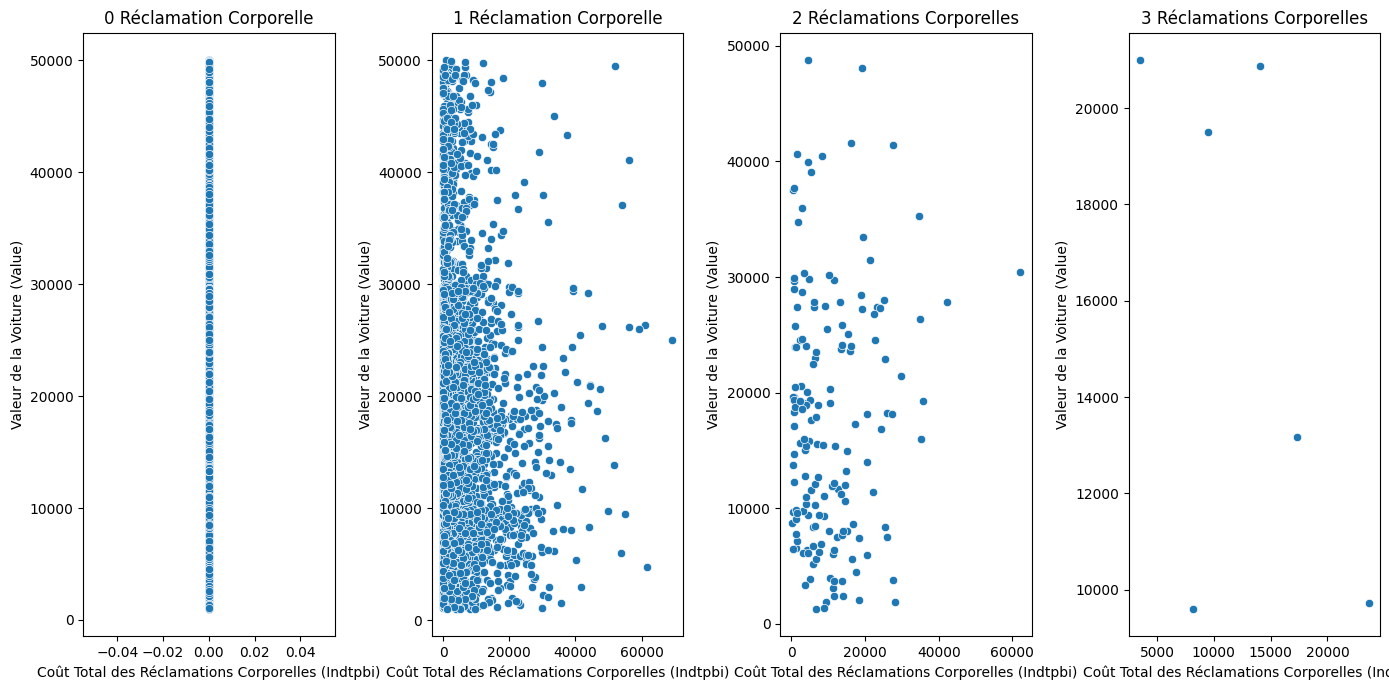

In [ ]:
#prix de la voiture et coût total de réclamation corporelles pour 1 réclamation puis 2 rééclamations

df_0_claim = df[df['Numtpbi'] == 0]

df_1_claim = df[df['Numtpbi'] == 1]

# Filtrer le DataFrame pour les cas avec 2 réclamations corporelles
df_2_claims = df[df['Numtpbi'] == 2]

# Filtrer le DataFrame pour les cas avec 3 réclamations corporelles
df_3_claims = df[df['Numtpbi'] == 3]

plt.figure(figsize=(14, 7))

# Scatter plot pour 0 réclamation corporelle
plt.subplot(1, 4, 1)
sns.scatterplot(data=df_0_claim, x='Indtpbi', y='Value')
plt.title('0 Réclamation Corporelle')
plt.xlabel('Coût Total des Réclamations Corporelles (Indtpbi)')
plt.ylabel('Valeur de la Voiture (Value)')

# Scatter plot pour 1 réclamation corporelle
plt.subplot(1, 4, 2)
sns.scatterplot(data=df_1_claim, x='Indtpbi', y='Value')
plt.title('1 Réclamation Corporelle')
plt.xlabel('Coût Total des Réclamations Corporelles (Indtpbi)')
plt.ylabel('Valeur de la Voiture (Value)')

# Scatter plot pour 2 réclamations corporelles
plt.subplot(1, 4, 3)
sns.scatterplot(data=df_2_claims, x='Indtpbi', y='Value')
plt.title('2 Réclamations Corporelles')
plt.xlabel('Coût Total des Réclamations Corporelles (Indtpbi)')
plt.ylabel('Valeur de la Voiture (Value)')

# Scatter plot pour 3 réclamations corporelles
plt.subplot(1, 4, 4)
sns.scatterplot(data=df_3_claims, x='Indtpbi', y='Value')
plt.title('3 Réclamations Corporelles')
plt.xlabel('Coût Total des Réclamations Corporelles (Indtpbi)')
plt.ylabel('Valeur de la Voiture (Value)')


plt.tight_layout()
plt.show()

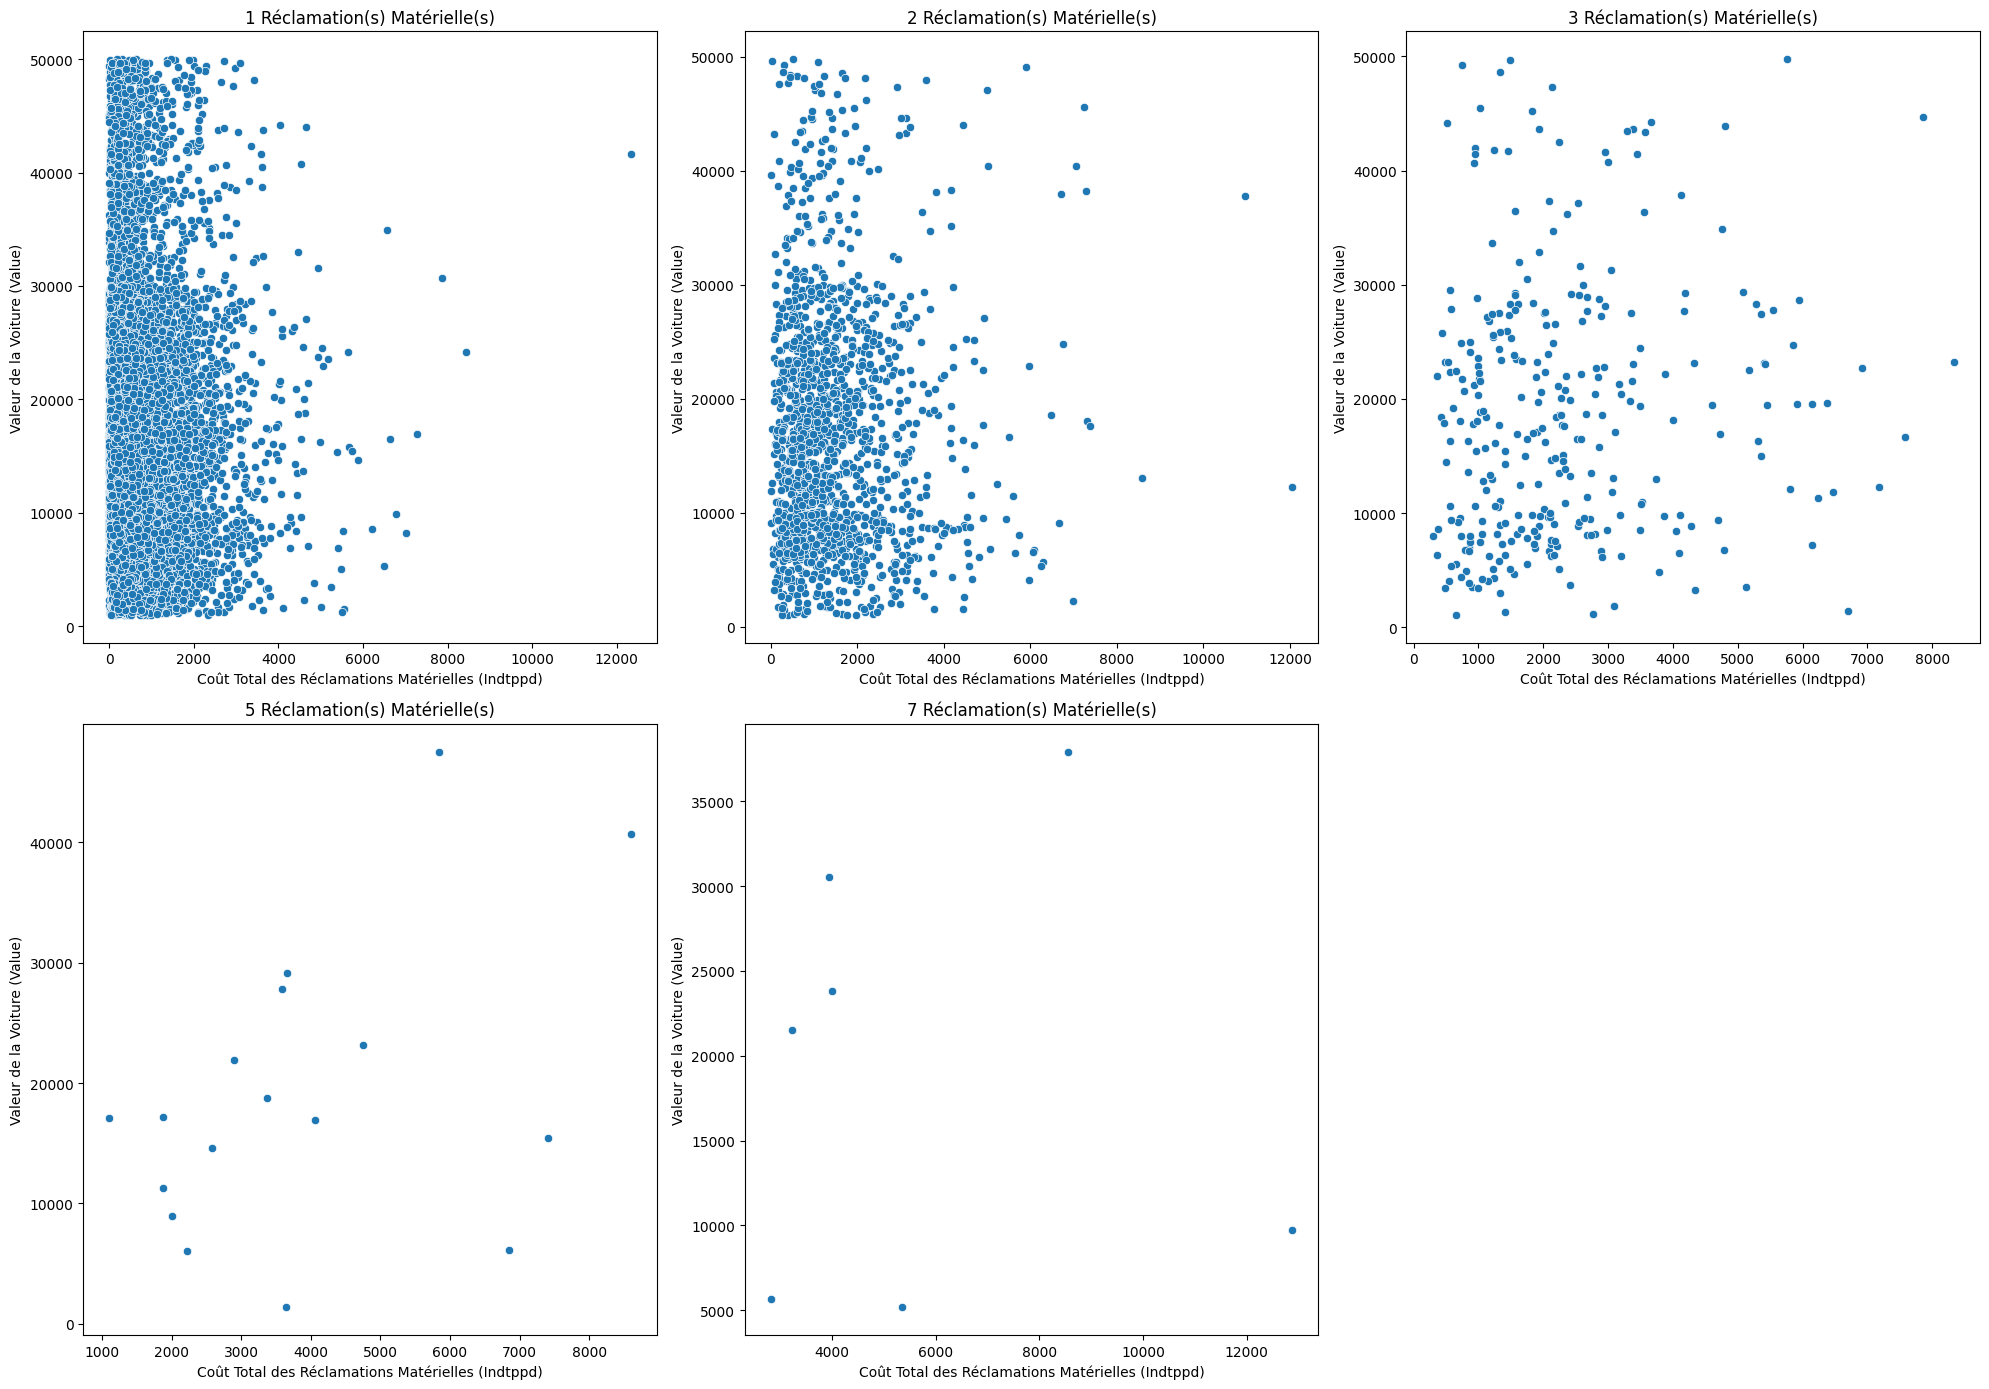

In [ ]:
##prix de la voiture et coût total de réclamation matérielles pour 1 réclamation puis 2 rééclamations

num_reclamations_list = [1, 2, 3, 5, 7]

# Initialisation d'une figure de taille appropriée
plt.figure(figsize=(20, 14))

for i, num_reclamations in enumerate(num_reclamations_list, start=1):
    # Filtrer le DataFrame pour les cas avec un nombre spécifié de réclamations matérielles
    df_filtered = df[df['Numtppd'] == num_reclamations]

    # Créer un subplot pour chaque nombre de réclamations
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_filtered, x='Indtppd', y='Value')

    plt.title(f'{num_reclamations} Réclamation(s) Matérielle(s)')
    plt.xlabel('Coût Total des Réclamations Matérielles (Indtppd)')
    plt.ylabel('Valeur de la Voiture (Value)')

plt.tight_layout()
plt.show()

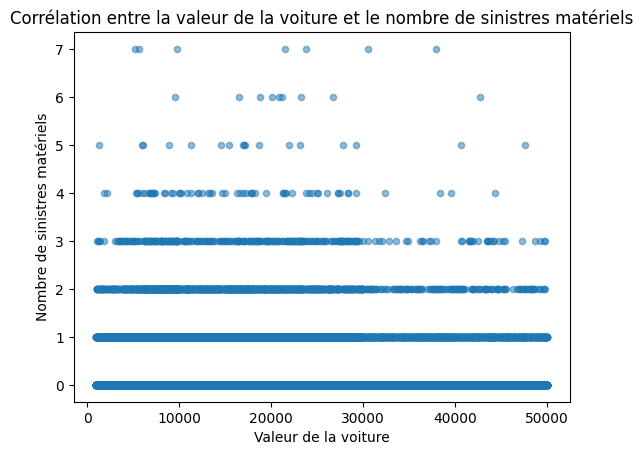

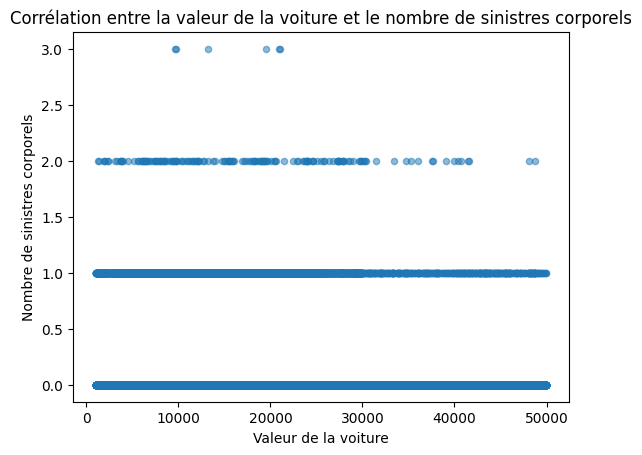

In [8]:
#Corrélation entre la valeur de la voiture et le nombre de sinistres:

df.plot(kind='scatter', x='Value', y='Numtppd', alpha=0.5)
plt.title('Corrélation entre la valeur de la voiture et le nombre de sinistres matériels')
plt.xlabel('Valeur de la voiture')
plt.ylabel('Nombre de sinistres matériels')
plt.show()

df.plot(kind='scatter', x='Value', y='Numtpbi', alpha=0.5)
plt.title('Corrélation entre la valeur de la voiture et le nombre de sinistres corporels')
plt.xlabel('Valeur de la voiture')
plt.ylabel('Nombre de sinistres corporels')
plt.show()

Sinistres matériels :

La distribution des points dans le premier graphique suggère qu'il n'y a pas de corrélation évidente entre la valeur de la voiture et le nombre de sinistres matériels. La majorité des points sont concentrés autour d'un faible nombre de sinistres, indépendamment de la valeur de la voiture. Il y a quelques valeurs aberrantes avec un nombre de sinistres matériels plus élevé, mais ces cas sont rares.

Sinistres corporels :

Dans le second graphique, il semble également y avoir peu ou pas de corrélation directe entre la valeur de la voiture et le nombre de sinistres corporels. Le nombre de sinistres corporels est généralement faible, avec la plupart des données montrant zéro ou un faible nombre de sinistres corporels, quelle que soit la valeur de la voiture.

In [ ]:
stat, p = shapiro(df['Value'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.9280951023101807
P-value : 0.0
La variable n'est probablement pas normalement distribuée


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Exppdays : Exposition (en jours)**

In [ ]:
# type, nombres valeurs
df["Exppdays"].info()

<class 'pandas.core.series.Series'>
Int64Index: 100021 entries, 1 to 100021
Series name: Exppdays
Non-Null Count   Dtype
--------------   -----
100021 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [ ]:
# Valeurs et Nombre de valeurs distinctes
print(df["Exppdays"].unique())
df["Exppdays"].nunique()

[365 355 321 220 120 188 138 298 246 275 236 206 195 317 301 117 190 249
 201 183 187 110 302 185 242 281 151 293 205 135 329 352 193 162 209 232
 312 286 234 159 139 180 181 207 116 305 137 309 166 226 200 285 240 154
 323 264 328 257 228 112 148 189 217 218 223 265  94 212 303 284 340 316
 336 267 156 278 338 105 224 276 219 289 300 134 313 311 102 146 225 255
 342 326 241 254 147  95 250 263 244 331 177 213  93 274 320 145 259 194
 179 140 121 171 273 222 243 106 307 270 203 277 204 126 101 163 173 235
 290 343 157 161 123 283 100 149 142 279 130 304 358 128 160 133 359 233
 347 165 129 363 155 143 168 118 119 291 182 221 141 318 354 178 306 287
 132 361 169 214 210 150 176 158 111 296 327 310 350 339 261 268 199 292
  97 252 253 198 334 114 271 345  96 351 282 260 262 211 322 288 127 125
 353 324 172 231 332 104  99 215 337 109 314 299 184 344 144 174 360 349
 245 333 294 208  91  92 122 152 227 229 346 237 247 269 319 308 113 136
 124 186 103 251 341 196 325 356 266 272 362 164 34

275

In [ ]:
# Étendue des valeurs, Équilibre
df["Exppdays"].value_counts()

365    72593
301      141
321      127
302      126
328      124
       ...  
185       79
236       78
219       76
271       75
175       68
Name: Exppdays, Length: 275, dtype: int64

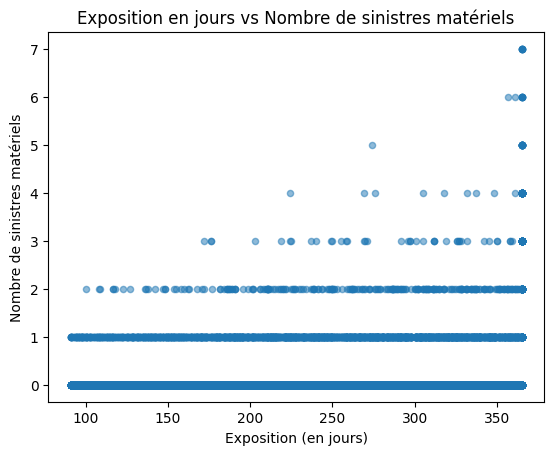

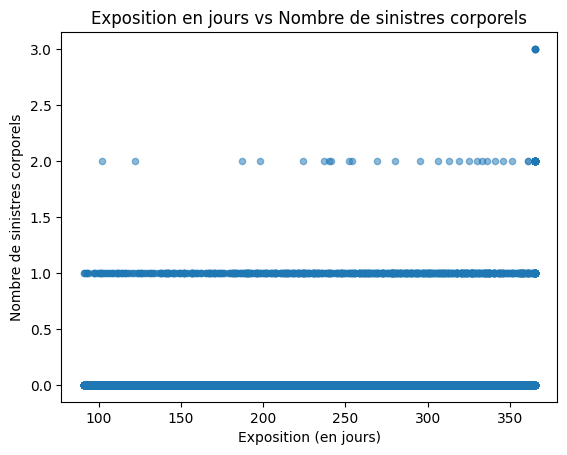

In [10]:
#Exposition (en jours) par rapport aux sinistres
df.plot(kind='scatter', x='Exppdays', y='Numtppd', alpha=0.5)
plt.title('Exposition en jours vs Nombre de sinistres matériels')
plt.xlabel('Exposition (en jours)')
plt.ylabel('Nombre de sinistres matériels')
plt.show()

df.plot(kind='scatter', x='Exppdays', y='Numtpbi', alpha=0.5)
plt.title('Exposition en jours vs Nombre de sinistres corporels')
plt.xlabel('Exposition (en jours)')
plt.ylabel('Nombre de sinistres corporels')
plt.show()